# Computer Vision 이상치 탐지 알고리즘 경진대회

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn')
sns.set(font_scale = 1.5)
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from google.colab.patches import cv2_imshow
import cv2
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

%matplotlib inline

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Study/Dacon/open/train_df.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Study/Dacon/open/test_df.csv')

In [ ]:
df_train.head()

,index,file_name,class,state,label
0,0,10000.png,transistor,good,transistor-good
1,1,10001.png,capsule,good,capsule-good
2,2,10002.png,transistor,good,transistor-good
3,3,10003.png,wood,good,wood-good
4,4,10004.png,bottle,good,bottle-good


In [ ]:
df_test.head()

,index,file_name
0,0,20000.png
1,1,20001.png
2,2,20002.png
3,3,20003.png
4,4,20004.png


In [ ]:
# 라벨 종류 확인
df_train['label'].unique()

array(['transistor-good', 'capsule-good', 'wood-good', 'bottle-good',
       'screw-good', 'cable-bent_wire', 'carpet-hole', 'hazelnut-good',
       'pill-pill_type', 'cable-good', 'metal_nut-scratch', 'pill-good',
       'screw-thread_side', 'zipper-fabric_border', 'leather-good',
       'pill-scratch', 'toothbrush-good', 'hazelnut-crack',
       'screw-manipulated_front', 'zipper-good', 'tile-good',
       'carpet-good', 'metal_nut-good', 'bottle-contamination',
       'grid-good', 'zipper-split_teeth', 'pill-crack', 'wood-combined',
       'pill-color', 'screw-thread_top', 'cable-missing_cable',
       'capsule-squeeze', 'zipper-rough', 'capsule-crack', 'capsule-poke',
       'metal_nut-flip', 'carpet-metal_contamination', 'metal_nut-color',
       'transistor-bent_lead', 'zipper-fabric_interior', 'leather-fold',
       'tile-glue_strip', 'screw-scratch_neck', 'screw-scratch_head',
       'hazelnut-cut', 'bottle-broken_large', 'bottle-broken_small',
       'leather-cut', 'cable-cut_

In [ ]:
# 자동 라벨링을 위한 폴더 생성
'''import os
 
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        pass
'''
'''path = '/content/drive/MyDrive/Study/Dacon/dataset/'
for i in df_train['label'].unique():
    dipath = path + i
    createFolder(dipath)'''

"path = '/content/drive/MyDrive/Study/Dacon/dataset/'\nfor i in df_train['label'].unique():\n    dipath = path + i\n    createFolder(dipath)"

In [ ]:
# 이미지 라벨링
'''from PIL import Image
for i in range(10000,14277):
    path ='/content/drive/MyDrive/Study/Dacon/dataset/' + str(df_train['label'][i-10000])

 
    image = Image.open("/content/drive/MyDrive/Study/Dacon/train/" + str(i) + '.png')

    image.save(path + '/' + str(i) + '.png','png')'''

'from PIL import Image\nfor i in range(10000,14277):\n    path =\'/content/drive/MyDrive/Study/Dacon/dataset/\' + str(df_train[\'label\'][i-10000])\n\n \n    image = Image.open("/content/drive/MyDrive/Study/Dacon/train/" + str(i) + \'.png\')\n\n    image.save(path + \'/\' + str(i) + \'.png\',\'png\')'

In [ ]:
# 라벨 종류 확인
print(len(df_train['label'].unique()))

88


In [ ]:
# 클래스 종류가 몇가지 인지 확인
df_train['class'].unique()

array(['transistor', 'capsule', 'wood', 'bottle', 'screw', 'cable',
       'carpet', 'hazelnut', 'pill', 'metal_nut', 'zipper', 'leather',
       'toothbrush', 'tile', 'grid'], dtype=object)

In [ ]:
# 상태 종류가 몇가지 인지 확인
df_train['state'].unique()

array(['good', 'bent_wire', 'hole', 'pill_type', 'scratch', 'thread_side',
       'fabric_border', 'crack', 'manipulated_front', 'contamination',
       'split_teeth', 'combined', 'color', 'thread_top', 'missing_cable',
       'squeeze', 'rough', 'poke', 'flip', 'metal_contamination',
       'bent_lead', 'fabric_interior', 'fold', 'glue_strip',
       'scratch_neck', 'scratch_head', 'cut', 'broken_large',
       'broken_small', 'cut_outer_insulation', 'squeezed_teeth',
       'defective', 'cut_inner_insulation', 'missing_wire', 'thread',
       'broken', 'faulty_imprint', 'glue', 'damaged_case', 'gray_stroke',
       'bent', 'print', 'broken_teeth', 'oil', 'misplaced', 'cable_swap',
       'poke_insulation', 'cut_lead', 'liquid'], dtype=object)

train 데이터는 4277개의 데이터  
test 데이터는 2154개의 데이터를 가지고 있다.  

---


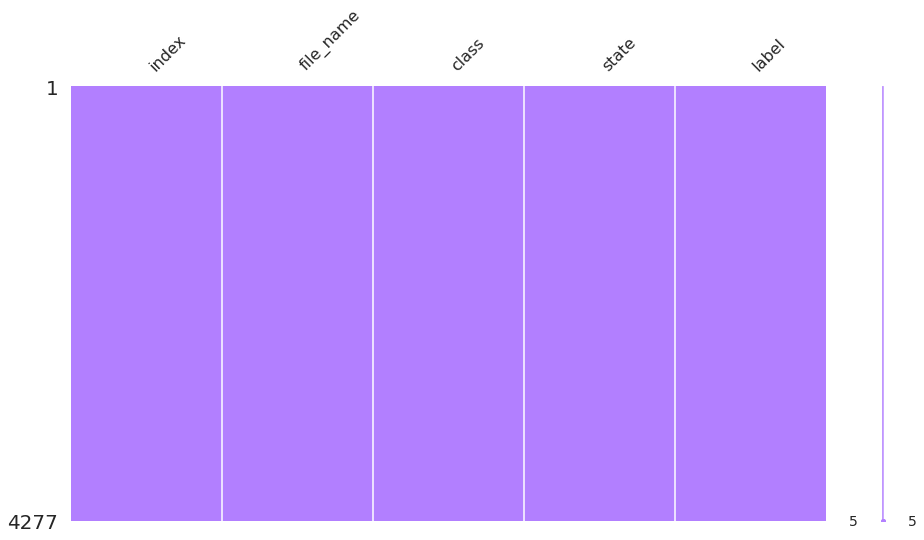

In [ ]:
msno.matrix(df=df_train.iloc[:,:],figsize=(15,8), color=(0.7,0.5,1))

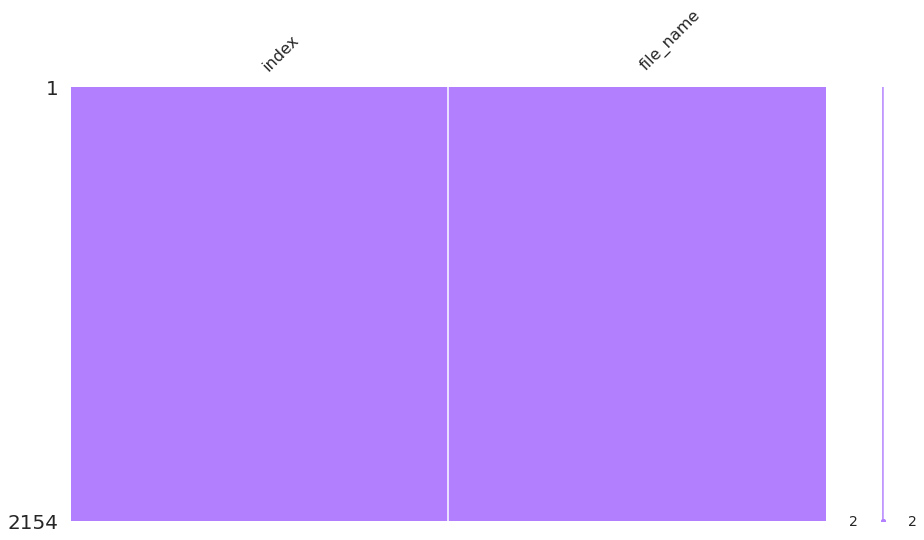

In [ ]:
msno.matrix(df=df_test.iloc[:,:],figsize=(15,8), color=(0.7,0.5,1))

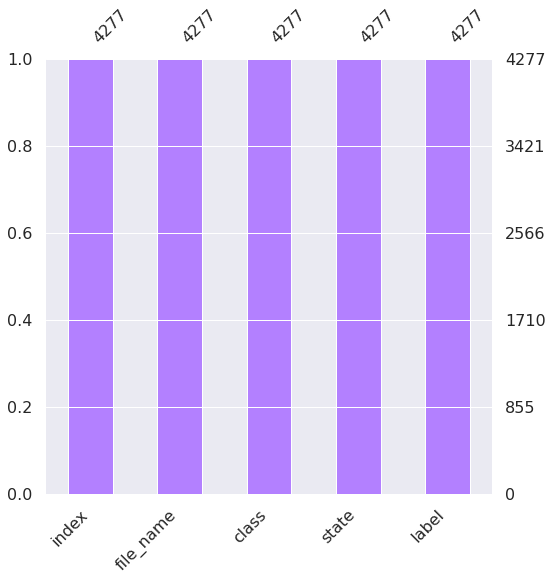

In [ ]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.7, 0.5, 1))

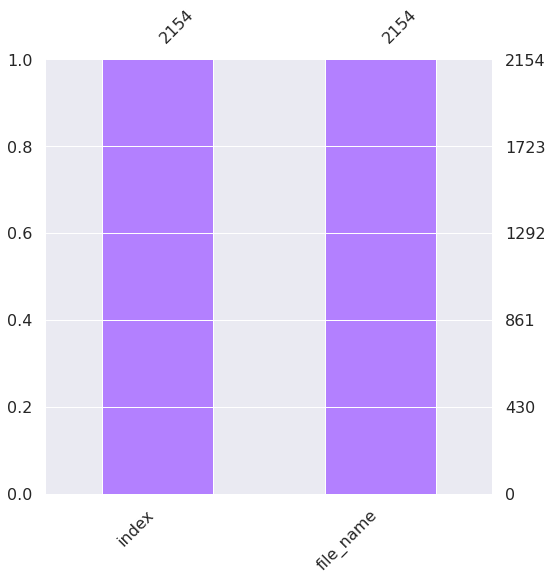

In [ ]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.7, 0.5, 1))

각 feature에 null 값이 없음을 확인할 수 있다.

No handles with labels found to put in legend.


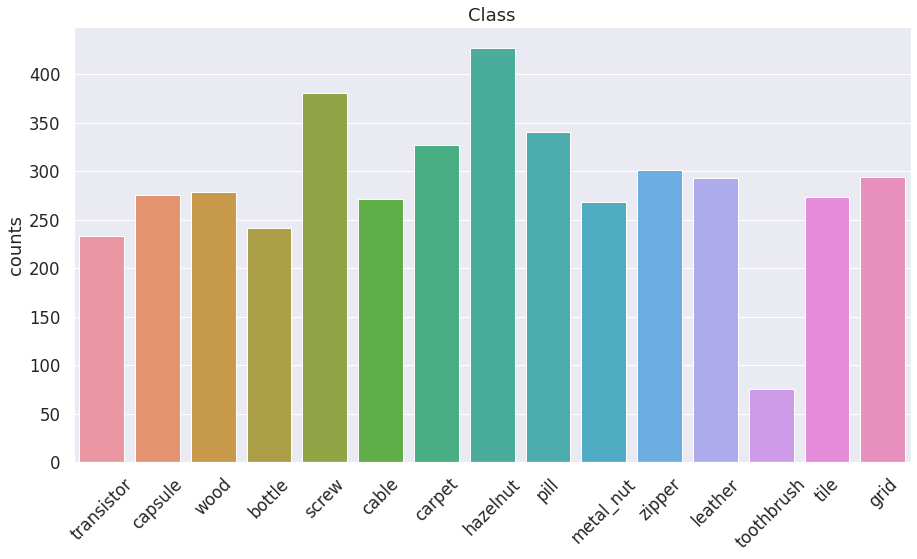

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1, 1,1)

plt.title('Class')
sns.countplot('class', data=df_train, ax=ax)

for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)

plt.xlabel('')
plt.ylabel('counts')
plt.legend()
plt.show()

다른 데이터에 비해서 toothbrush 데이터가 많이 부족한걸 볼 수 있는데 이로 인해서 나중에 훈련과정에서 제대로된 훈련이 안될 가능성이 높다.<br> 때문에 augmentation을 이용해서 toothbrush 데이터를 대략 200개 까지 만들 생각이다.

No handles with labels found to put in legend.


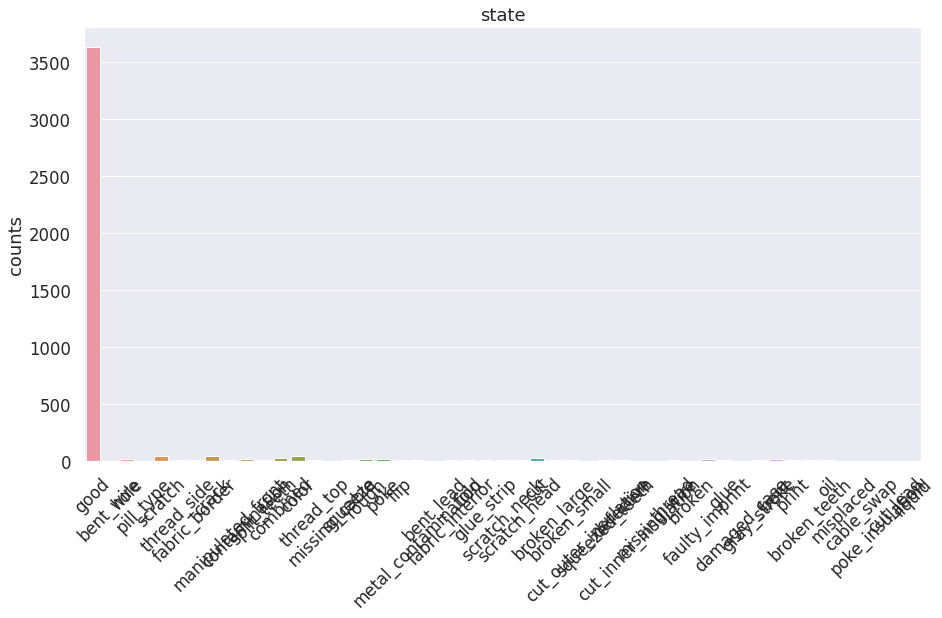

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1, 1,1)

plt.title('state')
sns.countplot('state', data=df_train, ax=ax)

for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)

plt.xlabel('')
plt.ylabel('counts')
plt.legend()
plt.show()

양품인 경우가 너무 많아서 양품일 경우를 제외하고 새로 데이터를 비교할 필요가 있다.<br>또한 데이터 비율이 너무 크게 차이나서 훈련이 제대로 안이뤄 질것이다.
<br>그렇기 때문에 augmentation을 통해 다른 데이터를 늘려줄 필요가 있다!

In [ ]:
is_broken = df_train['state'] !='good'

In [ ]:
broken = df_train[is_broken]

In [ ]:
broken

,index,file_name,class,state,label
8,8,10008.png,cable,bent_wire,cable-bent_wire
10,10,10010.png,carpet,hole,carpet-hole
13,13,10013.png,pill,pill_type,pill-pill_type
16,16,10016.png,metal_nut,scratch,metal_nut-scratch
19,19,10019.png,screw,thread_side,screw-thread_side
...,...,...,...,...,...
4245,4245,14245.png,leather,cut,leather-cut
4248,4248,14248.png,transistor,bent_lead,transistor-bent_lead
4251,4251,14251.png,cable,combined,cable-combined
4252,4252,14252.png,pill,color,pill-color


No handles with labels found to put in legend.


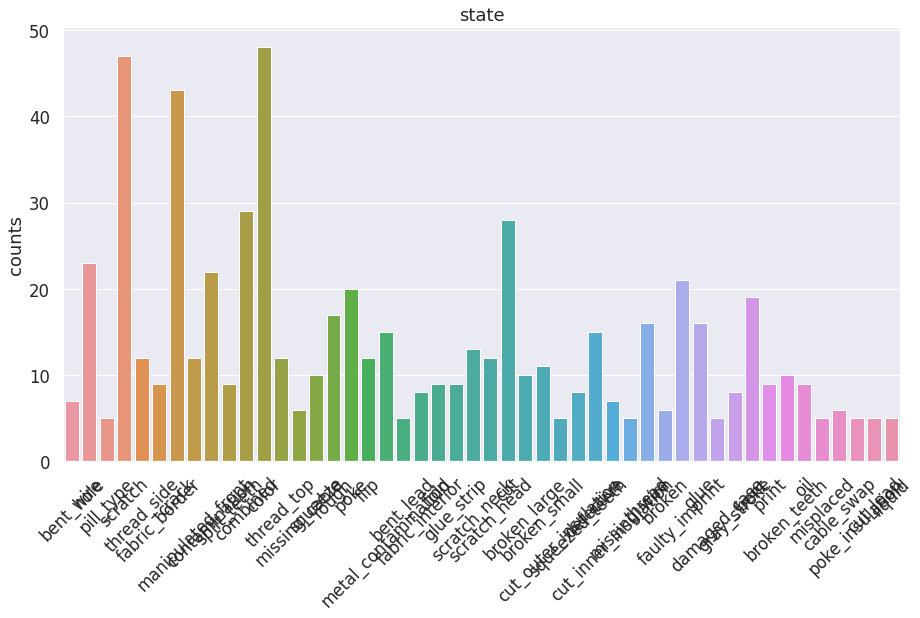

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1, 1,1)

plt.title('state')
sns.countplot('state', data=broken, ax=ax)

for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)

plt.xlabel('')
plt.ylabel('counts')
plt.legend()
plt.show()

In [ ]:
# trainset 불러오기
trainimg = glob.glob('/content/drive/MyDrive/Study/Dacon/train/*.png')

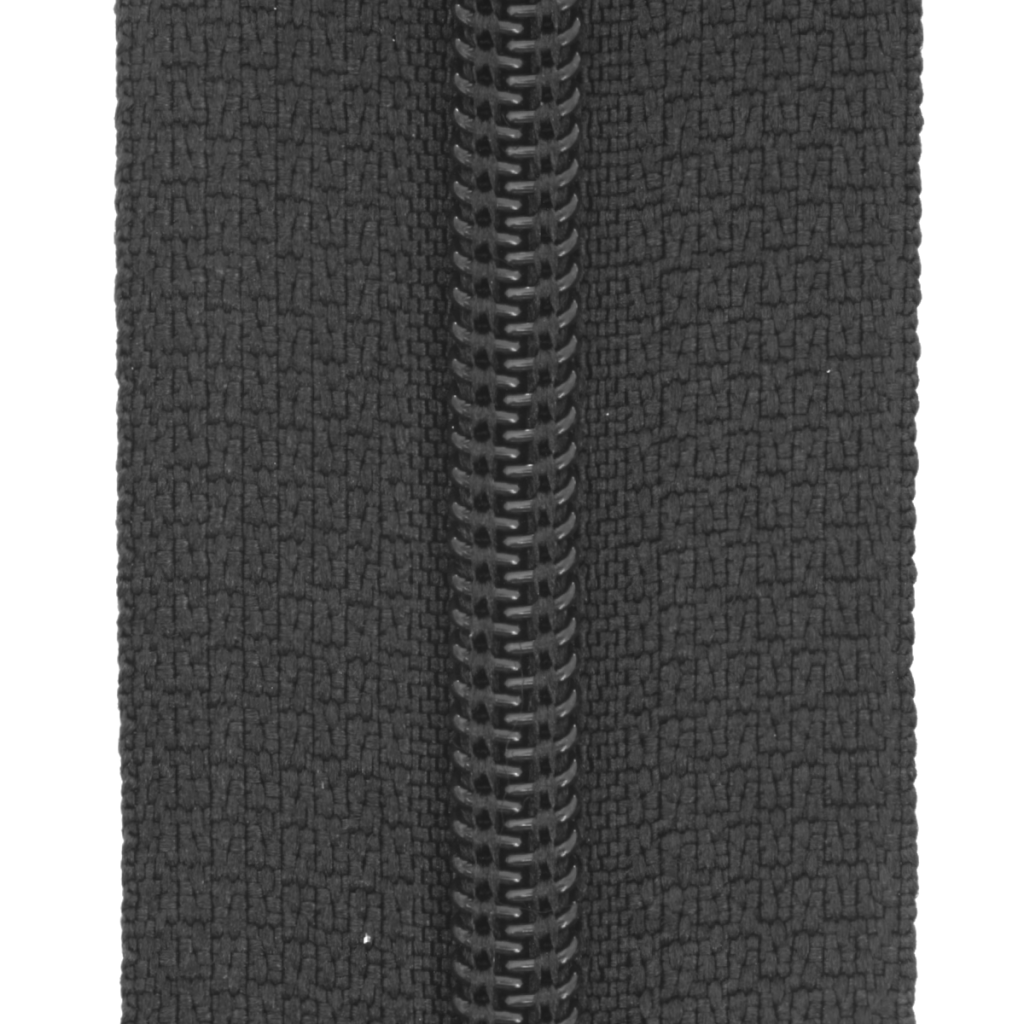

In [ ]:
img = cv2.imread(trainimg[0], cv2.IMREAD_COLOR)
cv2_imshow(img)

In [ ]:
print(img.shape)

(1024, 1024, 3)


In [ ]:
print(len(trainimg))

4277


## 이미지 데이터셋

In [ ]:
data_dir = '/content/drive/MyDrive/Study/Dacon/dataset'

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4277 files belonging to 88 classes.
Using 3422 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4277 files belonging to 88 classes.
Using 855 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bottle-broken_large', 'bottle-broken_small', 'bottle-contamination', 'bottle-good', 'cable-bent_wire', 'cable-cable_swap', 'cable-combined', 'cable-cut_inner_insulation', 'cable-cut_outer_insulation', 'cable-good', 'cable-missing_cable', 'cable-missing_wire', 'cable-poke_insulation', 'capsule-crack', 'capsule-faulty_imprint', 'capsule-good', 'capsule-poke', 'capsule-scratch', 'capsule-squeeze', 'carpet-color', 'carpet-cut', 'carpet-good', 'carpet-hole', 'carpet-metal_contamination', 'carpet-thread', 'grid-bent', 'grid-broken', 'grid-glue', 'grid-good', 'grid-metal_contamination', 'grid-thread', 'hazelnut-crack', 'hazelnut-cut', 'hazelnut-good', 'hazelnut-hole', 'hazelnut-print', 'leather-color', 'leather-cut', 'leather-fold', 'leather-glue', 'leather-good', 'leather-poke', 'metal_nut-bent', 'metal_nut-color', 'metal_nut-flip', 'metal_nut-good', 'metal_nut-scratch', 'pill-color', 'pill-combined', 'pill-contamination', 'pill-crack', 'pill-faulty_imprint', 'pill-good', 'pill-pill_type',

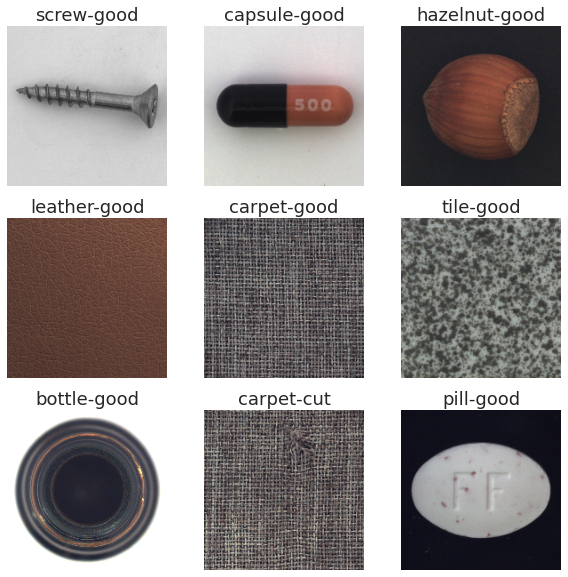

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## 이미지 전처리

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])

## Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.1),
])

## Model 만들기

In [ ]:
num_classes = 88

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
107/107 [==============================] - 376s 731ms/step - loss: 1.8844 - accuracy: 0.6537 - val_loss: 1.3903 - val_accuracy: 0.7789
Epoch 2/10
107/107 [==============================] - 2s 19ms/step - loss: 0.9525 - accuracy: 0.8393 - val_loss: 1.1063 - val_accuracy: 0.8023
Epoch 3/10
107/107 [==============================] - 2s 19ms/step - loss: 0.8212 - accuracy: 0.8404 - val_loss: 1.0740 - val_accuracy: 0.7860
Epoch 4/10
107/107 [==============================] - 2s 19ms/step - loss: 0.7710 - accuracy: 0.8410 - val_loss: 0.9643 - val_accuracy: 0.7942
Epoch 5/10
107/107 [==============================] - 2s 19ms/step - loss: 0.7148 - accuracy: 0.8486 - val_loss: 0.9104 - val_accuracy: 0.8234
Epoch 6/10
107/107 [==============================] - 2s 20ms/step - loss: 0.6911 - accuracy: 0.8513 - val_loss: 0.9309 - val_accuracy: 0.8211
Epoch 7/10
107/107 [==============================] - 2s 19ms/step - loss: 0.6776 - accuracy: 0.8542 - val_loss: 0.9488 - val_accuracy: 0.8

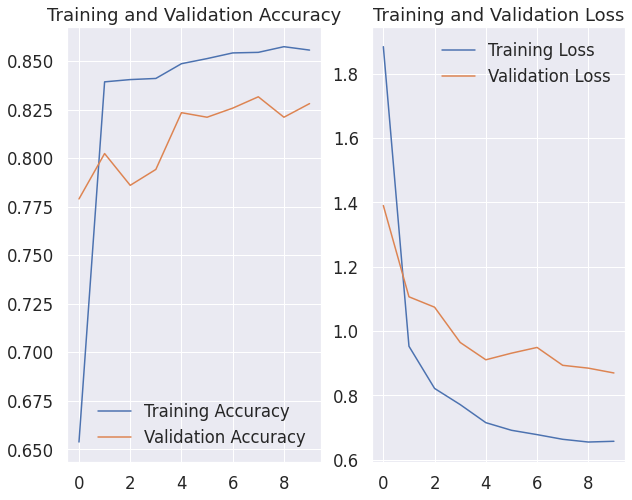

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save_weights('/content/drive/MyDrive/Study/Dacon/my_model.h5')

In [ ]:
# 모델 로드
'''model = keras.models.load_model('/content/drive/MyDrive/Study/Dacon/my_model.h5')'''

In [ ]:
from keras.preprocessing import image
import matplotlib.image as img
res = []
for i in range(20000,20003):
    dir = '/content/drive/MyDrive/Study/Dacon/test/' + str(i) + '.png' 
    img = img.imread(dir)
    img = img.resize(180,180)
    img = img/255.0

    pred = model.predict(img)
    print(pred)

TypeError: ignored